In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mta = pd.read_excel('Significant_MTAs.xlsx', sheet_name='Significant MTA')
mta.head()

,Trait,Marker,Chr,Pos,Ref,Alt,df,F,p,-log10(p),chr:pos,Nearest gene,Nearest gene annotation (WheatIS),Candidate gene,Candidate gene description,Do we need a KASP-marker,Candidate gene reference (DOI),Reference article title
0,Awns,IAB09131,5A,698510016,T,C,2,657.84697,1.732500e-83,82.761327,chr5A:698510016,TraesCS5A02G542600,Hexose carrier protein HEX6,TraesCS5A02G542800,C2H2 zinc finger transcriptional repressor,Yes,10.1111/nph.16152,Sequence-based mapping identifies a candidate ...
1,Awns,IAB48252,5A,708290964,NaN,NaN,2,25.33744,2.016000e-10,9.695509,chr5A:708290964,TraesCS5A02G557200,Obtusifoliol 14-alpha demethylase,TraesCS5A02G542800,C2H2 zinc finger transcriptional repressor,-,10.1111/nph.16152,Sequence-based mapping identifies a candidate ...
2,Plant height,IAB60001,4B,30861562,NaN,NaN,1,22.77962,3.732600e-06,5.427989,chr4B:30861562,TraesCS4B02G043100,DELLA protein RHT-1,TraesCS4B02G043100,Rht-B1e,No,10.1104/pp.111.183657,Molecular Characterization of Rht-1 Dwarfing G...
3,Plant height,IAB07969,4D,18781242,NaN,NaN,1,24.28764,1.865900e-06,5.729112,chr4D:18781242,TraesCS4D02G040400,DELLA protein RHT-1,TraesCS4D02G040400,Rht-D1b,No,10.1104/pp.111.183657,Molecular Characterization of Rht-1 Dwarfing G...
4,Plant height,IAB57498,7B,407491560,NaN,NaN,2,18.69817,4.186300e-08,7.378170,chr7B:407491560,TraesCS7B02G397710LC,Uncharacterized,TraesCS7B02G055300,TaDHL-7B,Yes,10.3390/genes13060979,"ATP-dependent DNA helicase (TaDHL), a Novel Re..."


In [3]:
genotypes = pd.read_excel('Genotypes_filtered_imputed.xlsx', index_col='rs#')

In [4]:
genotypes_t = genotypes.transpose(copy=True)
genotypes_t.head()

rs#,IAB00012,IAB00017,IAB00031,IAB00041,IAB00062,IAB00085,IAB00113,IAB00129,IAB00133,IAB00151,...,IAB59691,IAB59696,IAB59697,IAB59733,IAB59734,IAB59763,IAB59860,IAB59908,IAB59987,IAB60001
alleles,C/T,T/C,A/G,A/G,C/T,G/T,A/G,C/A,A/T,A/C,...,G/C,C/T,C/G,A/G,C/T,A/T,A/G,T/C,C/G/T,A/T
chrom,1A,1A,1A,1A,1A,1A,1A,1A,1A,1A,...,UN,UN,UN,UN,UN,UN,UN,UN,UN,4B
pos,3776696,3847127,7643152,8295524,10068689,16434515,25791352,32476243,33374447,38729513,...,75460792,76409169,76763602,93835665,93835685,110692168,238397465,306757712,405155432,30861562
strand,+,+,+,+,+,+,+,+,+,+,...,+,+,+,+,+,+,+,+,+,+
assembly#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
phenotypes = pd.read_csv('Phenotype_BLUEs.txt', sep='\t', skiprows=2, index_col='Taxa')
phenotypes.head()

,awns,glumes_color,grain_shape,variety,development,starch_content_2019,starch_content_2019_t,septoria_blotch_leaf1_2019,septoria_blotch_leaf1_2019_t,septoria_blotch_leaf2_2019,...,grain_protein_content_t,grain_yield,plant_height,test_weight,starch_content_2019-2020,starch_content_2019-2020_t,Stripe_rust_2018-2019,Stripe_rust_2018-2019_t,septoria_blotch_2018-2019,septoria_blotch_2018-2019_t
Taxa,,,,,,,,,,,,,,,,,,,,,
ACPG_154,2.0,1.0,2.0,3.0,1.0,65.0,93.8,0.0,0.0,0.0,...,41.966667,5.333333,135.333330,731.33330,63.5,92.25,0.500000,5.000000,5.000000,16.100000
Adel,1.0,1.0,2.0,1.0,1.0,68.0,97.0,0.0,0.0,5.0,...,38.366670,8.233334,114.000000,818.00000,68.0,97.00,42.500000,70.500000,3.750000,19.250000
Afina,1.0,1.0,2.0,1.0,2.0,64.0,92.7,0.0,0.0,0.0,...,40.733334,8.466666,102.333336,805.66670,64.5,93.25,5.000000,16.100000,10.000000,23.200000
7675h34-34,1.0,1.0,2.0,1.0,1.0,65.0,93.8,30.0,58.0,50.0,...,38.627758,9.334805,80.510610,758.52264,65.5,94.30,21.367052,48.960983,39.466953,70.610916
Aivina,1.0,1.0,2.0,1.0,1.0,66.0,94.8,5.0,22.6,20.0,...,38.566666,9.500000,94.000000,799.33330,66.0,94.80,10.500000,28.200000,8.750000,29.350000


In [6]:
df_joint = pd.concat((phenotypes, genotypes_t), ignore_index=False,  axis=1)
df_joint.head()

,awns,glumes_color,grain_shape,variety,development,starch_content_2019,starch_content_2019_t,septoria_blotch_leaf1_2019,septoria_blotch_leaf1_2019_t,septoria_blotch_leaf2_2019,...,IAB59691,IAB59696,IAB59697,IAB59733,IAB59734,IAB59763,IAB59860,IAB59908,IAB59987,IAB60001
ACPG_154,2.0,1.0,2.0,3.0,1.0,65.0,93.8,0.0,0.0,0.0,...,C,C,C,A,C,A,A,T,C,A
Adel,1.0,1.0,2.0,1.0,1.0,68.0,97.0,0.0,0.0,5.0,...,G,T,C,A,C,A,A,T,C,A
Afina,1.0,1.0,2.0,1.0,2.0,64.0,92.7,0.0,0.0,0.0,...,G,T,C,A,C,A,A,T,C,A
7675h34-34,1.0,1.0,2.0,1.0,1.0,65.0,93.8,30.0,58.0,50.0,...,G,C,C,A,C,A,A,T,T,T
Aivina,1.0,1.0,2.0,1.0,1.0,66.0,94.8,5.0,22.6,20.0,...,G,T,C,G,T,A,A,T,C,A


In [7]:
df_joint.tail(20)

,awns,glumes_color,grain_shape,variety,development,starch_content_2019,starch_content_2019_t,septoria_blotch_leaf1_2019,septoria_blotch_leaf1_2019_t,septoria_blotch_leaf2_2019,...,IAB59691,IAB59696,IAB59697,IAB59733,IAB59734,IAB59763,IAB59860,IAB59908,IAB59987,IAB60001
Zimtra,1.0,1.0,2.0,1.0,1.0,66.0,94.8,0.0,0.0,0.0,...,G,T,C,A,C,A,A,T,T,A
Zina,1.0,1.0,2.0,1.0,1.0,66.0,94.8,0.0,0.0,0.0,...,G,C,G,A,C,A,A,C,C,A
Zolotokolosa,2.0,1.0,2.0,3.0,1.0,67.0,95.9,0.0,0.0,0.0,...,C,C,G,A,C,A,A,T,C,A
alleles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,G/C,C/T,C/G,A/G,C/T,A/T,A/G,T/C,C/G/T,A/T
chrom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,UN,UN,UN,UN,UN,UN,UN,UN,UN,4B
pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75460792,76409169,76763602,93835665,93835685,110692168,238397465,306757712,405155432,30861562
strand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,+,+,+,+,+,+,+,+,+,+
assembly#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
protLSID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\Михаил\AppData\Local\Temp\ipykernel_18464\3209239436.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.dropna(inplace=True)
C:\Users\Михаил\AppData\Local\Temp\ipykernel_18464\3209239436.py:36: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.3'` for the same effect.

  ax = sns.stripplot(data=df_part, x=marker, y=trait, hue=marker, color='.3')
C:\Users\Михаил\AppData\Local\Temp\ipykernel_18464\3209239436.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part.dropna(inplace=True)
C:\Users\Михаил\AppData\Local\Temp\ipykern

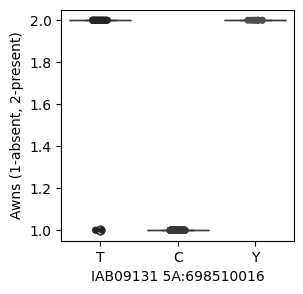

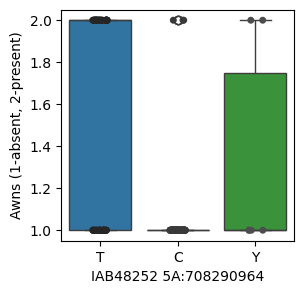

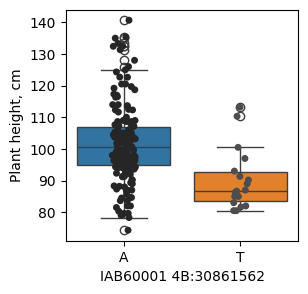

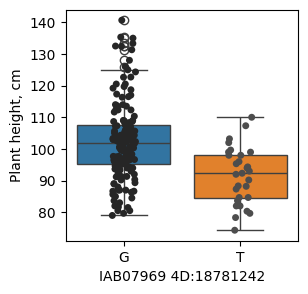

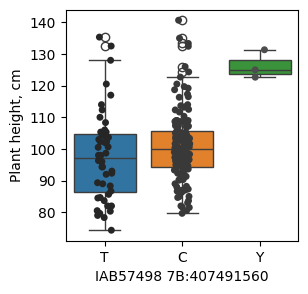

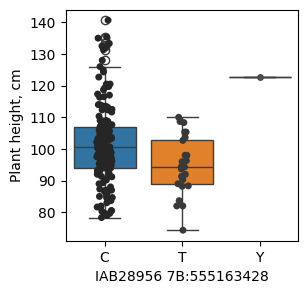

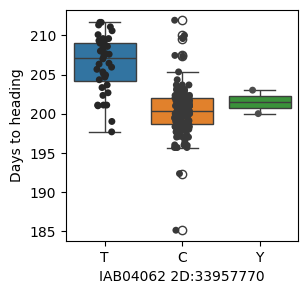

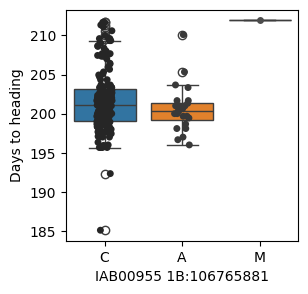

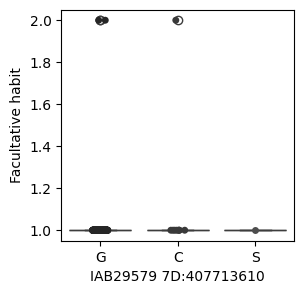

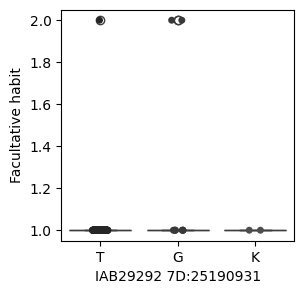

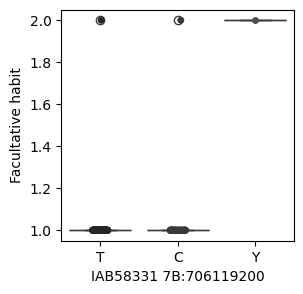

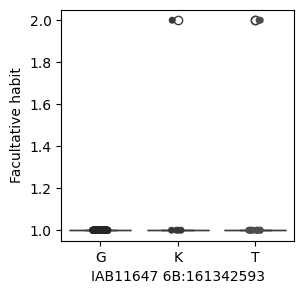

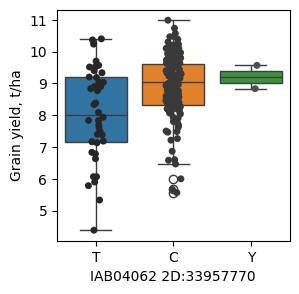

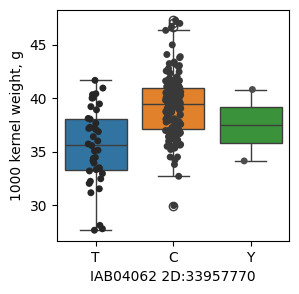

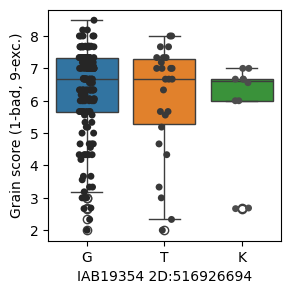

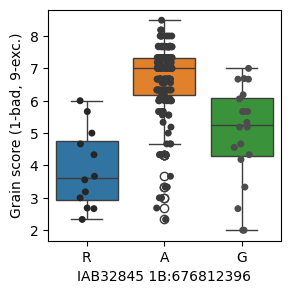

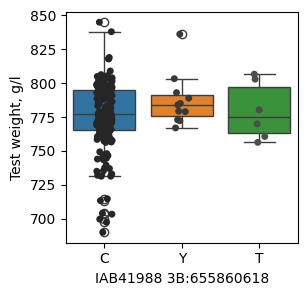

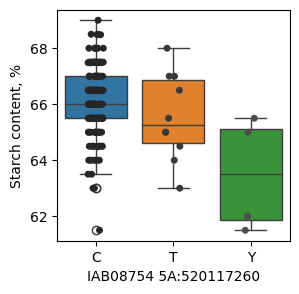

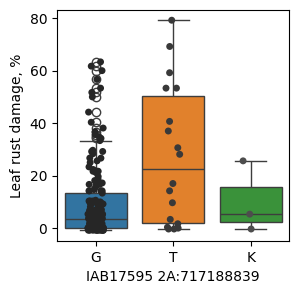

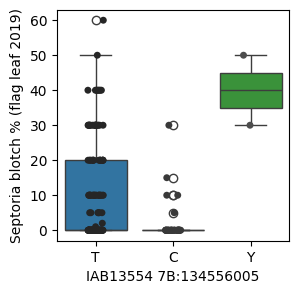

In [10]:
dict = {'Awns': 'awns',
     'Plant height': 'plant_height',
     'Days to heading': 'days_to_heading',
     'Facultative habit': 'development',
     'Grain yield': 'grain_yield',
     '1000 kernel weight': '1000_kernel_weight',
     'Grain visual score': 'Grain_estimate_score',
     'Test weight': 'test_weight',
     'Starch content': 'starch_content_2019-2020',
     'Leaf rust': 'Leaf_rust',
     'Septoria blotch (flag leaf 2019)': 'septoria_blotch_leaf1_2019'}

y_axis_dict = {'Awns': 'Awns (1-absent, 2-present)',
     'Plant height': 'Plant height, cm',
     'Days to heading': 'Days to heading',
     'Facultative habit': 'Facultative habit',
     'Grain yield': 'Grain yield, t/ha',
     '1000 kernel weight': '1000 kernel weight, g',
     'Grain visual score': 'Grain score (1-bad, 9-exc.)',
     'Test weight': 'Test weight, g/l',
     'Starch content': 'Starch content, %',
     'Leaf rust': 'Leaf rust damage, %',
     'Septoria blotch (flag leaf 2019)': 'Septoria blotch % (flag leaf 2019)'}

for i in range(len(mta)):
    trait = mta.iloc[i]['Trait']
    trait_old = dict[trait]
    marker = mta.iloc[i]['Marker']
    df_part = df_joint[[trait_old, marker]]
    df_part.columns = [trait, marker]
    chrom = df_part[marker]['chrom']
    pos = df_part[marker]['pos']
    df_part.dropna(inplace=True)
    plt.figure(i, figsize=(3, 3))
    ax = sns.boxplot(data=df_part, x=marker, y=trait, hue=marker)
    ax = sns.stripplot(data=df_part, x=marker, y=trait, hue=marker, color='.3')
    ax.set(xlabel = marker + ' ' + chrom + ':' + str(pos))
    ax.set(ylabel = y_axis_dict[trait])
    
    plt.savefig('boxplot_'+ trait.replace(' ', '_') + '_' + marker + '.png', bbox_inches='tight', dpi=400)
